# Web Scraping and Introductory Data Analysis

Welcome to Homework 0, where we will delve into web scraping and perform an introductory data analysis. This homework will be a hands-on exercise that will help you become familiar with the process of extracting data from websites and conducting basic statistical analysis. 

## Objectives

By the end of this homework, you will be able to:

1. Set up a Python environment with the necessary libraries for web scraping and data analysis.
2. Write a web scraping script using Beautiful Soup and Selenium to collect data from a website.
3. Sample from the collected dataset and compare the statistics of the sample and the population.
   
## Tasks

1. **Environment Setup**: Install the required libraries such as Beautiful Soup, Selenium, pandas, numpy, matplotlib, and seaborn.

2. **Web Scraping**: Write a script to scrape transaction data from [Etherscan.io](https://etherscan.io/txs). Use Selenium to interact with the website and Beautiful Soup to parse the HTML content.

3. **Data Sampling**: Once the data is collected, create a sample from the dataset. Compare the sample statistics (mean and standard deviation) with the population statistics.


## Deliverables

1. A Jupyter notebook with all the code and explanations.
2. A detailed report on the findings, including the comparison of sample and population statistics.
Note: You can include the report in your notebook.

## Getting Started

Begin by setting up your Python environment and installing the necessary libraries. Then, proceed with the web scraping task, ensuring that you handle any potential issues such as rate limiting. Once you have the data, move on to the data sampling and statistical analysis tasks. 

Remember to document your process and findings in the Jupyter notebook, and to include visualizations where appropriate to illustrate your results. <br>
Good luck, and happy scraping!

## Data Collection (Etherscan)

In this section, we will use web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer. Our objective is to collect transactions from the **last 10 blocks** on Ethereum.

To accomplish this task, we will employ web scraping techniques to extract the transaction data from the Etherscan website. The URL we will be targeting for our data collection is:

[https://etherscan.io/txs](https://etherscan.io/txs)

### Steps

1. **Navigate to the URL**: Use Selenium to open the Etherscan transactions page in a browser.

2. **Locate the Transaction Data**: Identify the HTML elements that contain the transaction data for the specified block range.

3. **Extract the Data**: Write a script to extract the transaction details e.g. Hash, Method, Block, etc.

4. **Handle Pagination**: If the transactions span multiple pages, implement pagination handling to navigate through the pages and collect all relevant transaction data.

5. **Store the Data**: Save the extracted transaction data into a structured format, such as a CSV file or a pandas DataFrame, for further analysis.

### Considerations

- **Rate Limiting**: Be mindful of the website's rate limits to avoid being blocked. Implement delays between requests if necessary.
- **Dynamic Content**: The Etherscan website may load content dynamically. Ensure that Selenium waits for the necessary elements to load before attempting to scrape the data.
- **Data Cleaning**: After extraction, clean the data to remove any inconsistencies or errors that may have occurred during the scraping process.

### Resources

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Selenium Documentation](https://selenium-python.readthedocs.io/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Ethereum](https://ethereum.org/en/)

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
from io import StringIO

driver = webdriver.Firefox()

In [2]:
def wait_until_age_title_be_displayed():
    age_title = driver.find_element(By.XPATH, "//a[@class='age-datetime-with-tooltip']")
    while not age_title.is_displayed():
        pass

def wait_until_txn_fee_title_be_displayed():
    txn_fee_title = driver.find_element(By.XPATH, "//a[@class='switch-txn-fee-gas-price']")
    while not txn_fee_title.is_displayed():
        pass

def wait_until_titles_be_displayed():
    wait_until_age_title_be_displayed()
    wait_until_txn_fee_title_be_displayed()

In [3]:
driver.get("https://etherscan.io/txs")

wait_until_titles_be_displayed()
age_buttom = driver.find_element(By.CLASS_NAME, 'age-datetime-with-tooltip')
age_buttom.click()

In [4]:
table_body = driver.find_element(By.XPATH, "//tbody[@class='align-middle text-nowrap']")
tabel_body_first_row = table_body.find_element(By.TAG_NAME, "tr")
first_row_block = tabel_body_first_row.find_elements(By.TAG_NAME, "td")[3]
block_buttom = first_row_block.find_element(By.TAG_NAME, "a")
last_block_num = int(block_buttom.text)

In [5]:
from selenium.common.exceptions import NoSuchElementException

def go_next_page():
    try:
        next_page_buttom = driver.find_element(By.XPATH, "//a[@aria-label='Next']")
        next_page_buttom.click()
        return True
    except NoSuchElementException:
        return False

In [6]:
def get_transactions_table():
    wait_until_titles_be_displayed()
    transactions_table = pd.read_html(StringIO(driver.page_source))
    
    while go_next_page():
        wait_until_titles_be_displayed()
        transactions_table += pd.read_html(StringIO(driver.page_source))

    transactions_table = pd.concat(transactions_table, ignore_index=True)
    return transactions_table

In [7]:
def get_block(block_num):
    driver.get(f"https://etherscan.io/txs?block={block_num}")
    transactions_table = get_transactions_table()
    return transactions_table

In [8]:
blocks = []
for i in range(10):
    blocks.append(get_block(last_block_num - i))
driver.quit()

In [9]:
# from bs4 import BeautifulSoup

# soup = BeautifulSoup(driver.page_source)
# soup_table = soup.find('table')
# transactions_table = pd.read_html(StringIO(str(soup_table)))

In [10]:
blocks[9]

,Unnamed: 0,Txn Hash,Method,Block,Date Time (UTC),From,Unnamed: 6,To,Value,Txn Fee
0,NaN,0x39404a43a913507ca4bc607595b97e94d2ac9c41d299...,Transfer,19392616,2024-03-08 19:44:23,Titan Builder,NaN,Lido: Execution Layer Rewards Vault,0.073463848 ETH,0.001387
1,NaN,0x6534c444c8eaa08f24bc3ef2c069a31ba637217507f5...,Withdraw,19392616,2024-03-08 19:44:23,0xd04e9f09...74B591796,NaN,Tornado.Cash: Router,0 ETH,0.026865
2,NaN,0x3e041addd3fe77f2fc5498ea7b28f3e9bcd3db460447...,Transfer,19392616,2024-03-08 19:44:23,Binance 18,NaN,Tether: USDT Stablecoin,0 ETH,0.004091
3,NaN,0x335f252b8fbb4bc3b865d6d9a51372ec7e077748a3f7...,0x415565b0,19392616,2024-03-08 19:44:23,0x26979e4A...a861D83bb,NaN,0x: Exchange Proxy,0 ETH,0.008936
4,NaN,0xb452719ae69b748099f0b4f02ff703622059c4aa42bf...,Transfer,19392616,2024-03-08 19:44:23,HitBTC: Deposit Funder 3,NaN,0x04dCa129...3C5b5Bd24,0.00469 ETH,0.001317
...,...,...,...,...,...,...,...,...,...,...
225,NaN,0xa8126aedabc8cb8d32b725c8a717cb984c16aba33835...,Transfer,19392616,2024-03-08 19:44:23,0x2f5668Ea...62941485a,NaN,0xEb8FB77B...8408c7B9a,0.093017432 ETH,0.002110
226,NaN,0xb194ea4a17572dac9f3cc9ee6ad9ebcf33266ba91adb...,Transfer,19392616,2024-03-08 19:44:23,Paribu 5,NaN,Floki: FLOKI Token,0 ETH,0.008712
227,NaN,0x2d653826b2178e0f2ae29cd4c1e72f976ea986cf0dd1...,0xe16dd1ef,19392616,2024-03-08 19:44:23,0xFf64E8E2...3C2bc1f4b,NaN,MEV Bot: 0xc6f...ae1,0 ETH,0.010867
228,NaN,0x24bf9c677b04e402832f66176eda00df512e30697310...,0x415565b0,19392616,2024-03-08 19:44:23,0x1156C10C...50aA19D37,NaN,0x: Exchange Proxy,0 ETH,0.042137


## Data Analysis

Now that we have collected the transaction data from Etherscan, the next step is to perform conduct an initial analysis. This task will involve the following steps:

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by converting data types, removing any irrelevant information, and handling **duplicate** values.

3. **Statistical Analysis**: Calculate the mean and standard deviation of the population. Evaluate these statistics to understand the distribution of transaction values. The analysis and plotting will be on **Txn Fee** and **Value**.

4. **Visualization**: This phase involves the creation of visual representations to aid in the analysis of transaction values. The visualizations include:
    - A histogram for each data column, which provides a visual representation of the data distribution. The selection of bin size is crucial and should be based on the data's characteristics to ensure accurate representation. Provide an explanation on the bin size selection!
    - A normal distribution plot fitted alongside the histogram to compare the empirical distribution of the data with the theoretical normal distribution.
    - A box plot and a violin plot to identify outliers and provide a comprehensive view of the data's distribution.

### Deliverables

The project aims to deliver the following deliverables:

- A refined pandas DataFrame containing the transaction data, which has undergone thorough cleaning and is ready for analysis.
- A simple statistical analysis evaluating the population statistics, offering insights into the distribution of transaction values and fees.
- A set of visualizations showcasing the distribution of transaction values for the population. These visualizations include histograms, normal distribution plots, box plots, and violin plots, each serving a specific purpose in the analysis.

### Getting Started

The project starts with the importing of transaction data into a pandas DataFrame, setting the stage for data manipulation and analysis. Subsequent steps involve the cleaning of the data to ensure its quality and reliability. Followed by the calculation of population statistics. Finally, a series of visualizations are created to visually analyze the distribution of transaction values and fees.

In [11]:
transactions_table = pd.concat(blocks, ignore_index=True)
transactions_table = transactions_table.rename(columns={'Unnamed: 6':'Is SELF'})
transactions_table.drop(transactions_table.columns[0], axis=1, inplace=True)

transactions_table = transactions_table.fillna(0)
transactions_table = transactions_table.astype({'Is SELF': bool})

transactions_table['Value'] = transactions_table['Value'].apply(lambda value: float(value.split()[0].replace(',', '')))
transactions_table = transactions_table.rename(columns={'Value':'Value (ETH)'})

didn't have any duplicated
change alghorithm


In [12]:
value_mean = transactions_table['Value (ETH)'].mean()
value_std = transactions_table['Value (ETH)'].std()

print(f'Value mean:     {value_mean:.5f}')
print(f'Value std:      {value_std:.5f}')

txn_fee_mean = transactions_table['Txn Fee'].mean()
txn_fee_std = transactions_table['Txn Fee'].std()

print(f'Txn Fee mean:   {txn_fee_mean:.5f}')
print(f'Txn Fee std:    {txn_fee_std:.5f}')

Value mean:     0.78048
Value std:      7.44666
Txn Fee mean:   0.00757
Txn Fee std:    0.01633


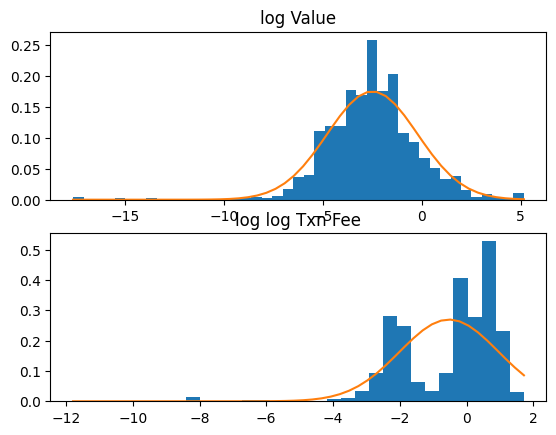

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

non_zero_values = transactions_table[transactions_table['Value (ETH)'] != 0]['Value (ETH)']
log_values = np.log(non_zero_values)
bins_values = np.histogram_bin_edges(log_values, bins='auto')
x_values = np.linspace(log_values.min(), log_values.max())

plt.subplot(211)
plt.hist(log_values, bins=bins_values, density=True)
plt.plot(x_values, norm.pdf(x_values, log_values.mean(), log_values.std()))
plt.title('log Value')

txn_fees = transactions_table['Txn Fee']
log_txn_fees = np.log(txn_fees)
log_txn_fees_shifted_to_positives = log_txn_fees - log_txn_fees.min()
log_log_txn_fees = np.log(log_txn_fees_shifted_to_positives[log_txn_fees_shifted_to_positives != 0])
bins_txn_fees = np.histogram_bin_edges(log_log_txn_fees, bins='auto')
x_txn_fees = np.linspace(log_log_txn_fees.min(), log_log_txn_fees.max())

plt.subplot(212)
plt.hist(log_log_txn_fees, bins=bins_txn_fees, density=True)
plt.plot(x_txn_fees, norm.pdf(x_txn_fees, log_log_txn_fees.mean(), log_log_txn_fees.std()))
plt.title('log log Txn Fee')

plt.show()

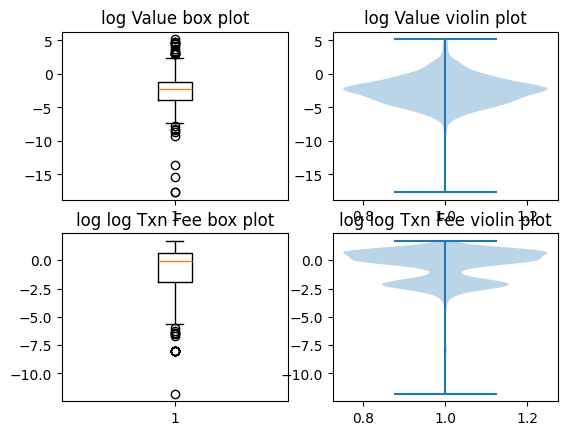

In [14]:
plt.subplot(221)
plt.boxplot(log_values)
plt.title('log Value box plot')

plt.subplot(222)
plt.violinplot(log_values)
plt.title('log Value violin plot')

plt.subplot(223)
plt.boxplot(log_log_txn_fees)
plt.title('log log Txn Fee box plot')

plt.subplot(224)
plt.violinplot(log_log_txn_fees)
plt.title('log log Txn Fee violin plot')

plt.show()

In [15]:
def remove_outliers(data, whis=1.5):
    data = np.array(data)
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1

    filtered_data_index = np.where(np.logical_and(data > Q1 - whis*IQR, data < Q3 + whis*IQR))
    return data[filtered_data_index]

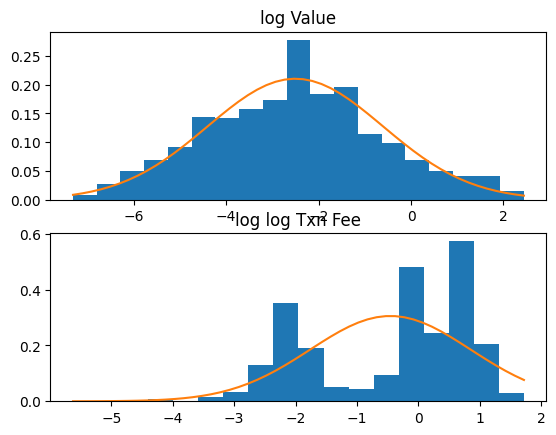

In [16]:
log_clean_values = remove_outliers(log_values)
log_log_clean_txn_fees = remove_outliers(log_log_txn_fees)

bins_clean_values = np.histogram_bin_edges(log_clean_values, bins='auto')
x_clean_values = np.linspace(log_clean_values.min(), log_clean_values.max())

bins_clean_txn_fees = np.histogram_bin_edges(log_log_clean_txn_fees, bins='auto')
x_clean_txn_fees = np.linspace(log_log_clean_txn_fees.min(), log_log_clean_txn_fees.max())

plt.subplot(211)
plt.hist(log_clean_values, bins=bins_clean_values, density=True)
plt.plot(x_clean_values, norm.pdf(x_clean_values, log_clean_values.mean(), log_clean_values.std()))
plt.title('log Value')

plt.subplot(212)
plt.hist(log_log_clean_txn_fees, bins=bins_clean_txn_fees, density=True)
plt.plot(x_clean_txn_fees, norm.pdf(x_clean_txn_fees, log_log_clean_txn_fees.mean(), log_log_clean_txn_fees.std()))
plt.title('log log Txn Fee')

plt.show()

## Data Sampling and Analysis

In this section, we will delve into the process of data sampling and perform an initial analysis on the transaction data we have collected. Our objective is to understand the distribution of transaction values by sampling the data and comparing the sample statistics with the population statistics.

### Steps

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by handling missing values, converting data types, and removing any irrelevant information.

3. **Simple Random Sampling (SRS)**: Create a sample from the dataset using a simple random sampling method. This involves randomly selecting a subset of the data without regard to any specific characteristics of the data.

4. **Stratified Sampling**: Create another sample from the dataset using a stratified sampling method. This involves dividing the data into strata based on a specific characteristic (e.g., transaction value) and then randomly selecting samples from each stratum. Explain what you have stratified the data by and why you chose this column.

5. **Statistical Analysis**: Calculate the mean and standard deviation of the samples and the population. Compare these statistics to understand the distribution of transaction values.

6. **Visualization**: Plot the distribution of transaction values and fees for both the samples and the population to visually compare their distributions.

### Considerations

- **Sample Size**: The size of the sample should be large enough to represent the population accurately but not so large that it becomes impractical to analyze.
- **Sampling Method**: Choose the appropriate sampling method based on the characteristics of the data and the research question.

Explain the above considerations in your report.

In [17]:
random_sample = transactions_table.sample(frac=0.1)

bins = np.histogram_bin_edges(transactions_table['Value (ETH)'], bins='auto')
transactions_table['group'] = pd.cut(transactions_table['Value (ETH)'], bins=bins)
stratified_sample = transactions_table.groupby('group', group_keys=False).apply(lambda x: x.sample(frac=0.2))

/tmp/ipykernel_20220/2063004878.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified_sample = transactions_table.groupby('group', group_keys=False).apply(lambda x: x.sample(frac=0.2))
/tmp/ipykernel_20220/2063004878.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = transactions_table.groupby('group', group_keys=False).apply(lambda x: x.sample(frac=0.2))


In [18]:
value_mean = transactions_table['Value (ETH)'].mean()
value_std = transactions_table['Value (ETH)'].std()

random_value_mean = random_sample['Value (ETH)'].mean()
random_value_std = random_sample['Value (ETH)'].std()

stratified_value_mean = stratified_sample['Value (ETH)'].mean()
stratified_value_std = stratified_sample['Value (ETH)'].std()

print(f'Population Value mean:          {value_mean:.5f}')
print(f'Random Sample Value mean:       {random_value_mean:.5f}')
print(f'Stratified Sample Value mean:   {stratified_value_mean:.5f}')
print('\n')
print(f'Population Value std:           {value_std:.5f}')
print(f'Random Sample Value std:        {random_value_std:.5f}')
print(f'Stratified Sample Value std:    {stratified_value_std:.5f}')

Population Value mean:          0.78048
Random Sample Value mean:       0.20929
Stratified Sample Value mean:   0.25608


Population Value std:           7.44666
Random Sample Value std:        0.92897
Stratified Sample Value std:    0.66244


In [19]:
txn_fee_mean = transactions_table['Txn Fee'].mean()
txn_fee_std = transactions_table['Txn Fee'].std()

random_txn_fee_mean = random_sample['Txn Fee'].mean()
random_txn_fee_std = random_sample['Txn Fee'].std()

stratified_txn_fee_mean = stratified_sample['Txn Fee'].mean()
stratified_txn_fee_std = stratified_sample['Txn Fee'].std()

print(f'Population Txn Fee mean:        {txn_fee_mean:.5f}')
print(f'Random Sample Txn Fee mean:     {random_txn_fee_mean:.5f}')
print(f'Stratified Sample Txn Fee mean: {stratified_txn_fee_mean:.5f}')
print('\n')
print(f'Population Txn Fee std:         {txn_fee_std:.5f}')
print(f'Random Sample Txn Fee std:      {random_txn_fee_std:.5f}')
print(f'Stratified Sample Txn Fee std:  {stratified_txn_fee_std:.5f}')

Population Txn Fee mean:        0.00757
Random Sample Txn Fee mean:     0.00822
Stratified Sample Txn Fee mean: 0.00549


Population Txn Fee std:         0.01633
Random Sample Txn Fee std:      0.01604
Stratified Sample Txn Fee std:  0.00610


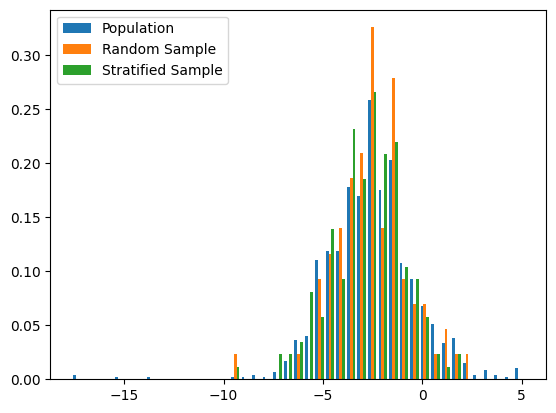

In [20]:
non_zero_random_values = random_sample[random_sample['Value (ETH)'] != 0]['Value (ETH)']
log_random_values = np.log(non_zero_random_values)

non_zero_stratified_values = stratified_sample[stratified_sample['Value (ETH)'] != 0]['Value (ETH)']
log_stratified_values = np.log(non_zero_stratified_values)

plt.hist([log_values, log_random_values, log_stratified_values], bins=bins_values, density=True, label=['Population', 'Random Sample', 'Stratified Sample'])

plt.legend()
plt.show()

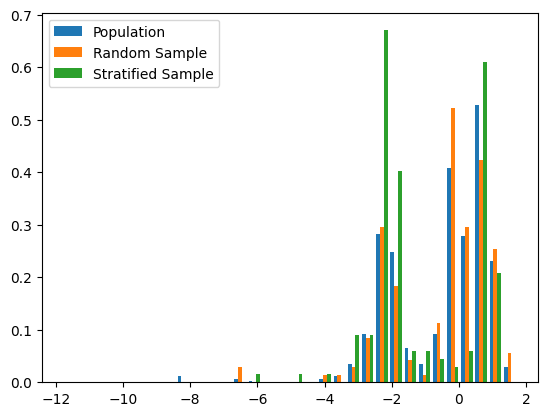

In [21]:
non_zero_random_txn_fees = random_sample[random_sample['Txn Fee'] != 0]['Txn Fee']
log_random_txn_fees = np.log(non_zero_random_txn_fees)
log_random_txn_fees_shifted_to_positives = log_random_txn_fees - log_random_txn_fees.min()
log_log_random_txn_fees = np.log(log_random_txn_fees_shifted_to_positives[log_random_txn_fees_shifted_to_positives != 0])

non_zero_stratified_txn_fees = stratified_sample[stratified_sample['Txn Fee'] != 0]['Txn Fee']
log_stratified_txn_fees = np.log(non_zero_stratified_txn_fees)
log_stratified_txn_fees_shifted_to_positives = log_stratified_txn_fees - log_stratified_txn_fees.min()
log_log_stratified_txn_fees = np.log(log_stratified_txn_fees_shifted_to_positives[log_stratified_txn_fees_shifted_to_positives != 0])


plt.hist([log_log_txn_fees, log_log_random_txn_fees, log_log_stratified_txn_fees], bins=bins_txn_fees, density=True, label=['Population', 'Random Sample', 'Stratified Sample'])

plt.legend()
plt.show()